In [28]:
import pandas as pd
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df_customers = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/customers.csv", sep =";")
df_products = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/products.csv",sep =";")
df_transactions = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/Transactions.csv", sep =";")

In [4]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [5]:
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [6]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [16]:
df = pd.merge(df_transactions, df_customers, on="client_id")


In [20]:
df = pd.merge(df,df_products, on='id_prod')
df

,id_prod,date,session_id,client_id,sex,birth,price_x,categ_x,price_y,categ_y,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,11.99,0,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0,19.37,0,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0,4.50,0,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0,6.55,0,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0,16.49,0,16.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,21.92,1,21.92,1,21.92,1
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,48.99,2,48.99,2,48.99,2
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,26.99,1,26.99,1,26.99,1
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,8.99,0,8.99,0,8.99,0


In [30]:

print(df['date'].dtype)

object


In [31]:
is_list = df['date'].apply(lambda x: isinstance(x, list))
print(df[is_list])


       id_prod                           date session_id client_id sex  birth  \
0       0_1259  [2021-03-01, 00:01:07.843138]        s_1     c_329   f   1967   
1       0_1390  [2021-03-01, 00:02:26.047414]        s_2     c_664   m   1960   
2       0_1352  [2021-03-01, 00:02:38.311413]        s_3     c_580   m   1988   
3       0_1458  [2021-03-01, 00:04:54.559692]        s_4    c_7912   f   1989   
4       0_1358  [2021-03-01, 00:05:18.801198]        s_5    c_2033   f   1956   
...        ...                            ...        ...       ...  ..    ...   
687529   1_508  [2023-02-28, 23:49:03.148402]   s_348444    c_3573   f   1996   
687530    2_37  [2023-02-28, 23:51:29.318531]   s_348445      c_50   f   1994   
687531   1_695  [2023-02-28, 23:53:18.929676]   s_348446     c_488   f   1985   
687532  0_1547  [2023-02-28, 23:58:00.107815]   s_348447    c_4848   m   1953   
687533  0_1398  [2023-02-28, 23:58:30.792755]   s_348435    c_3575   f   1981   

        price_x  categ_x  p

In [32]:
df.loc[is_list, 'date'] = df.loc[is_list, 'date'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df

,id_prod,date,session_id,client_id,sex,birth,price_x,categ_x,price_y,categ_y,price,categ,dat
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0,11.99,0,11.99,0,"[2021-03-01, 00:01:07.843138]"
1,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0,19.37,0,19.37,0,"[2021-03-01, 00:02:26.047414]"
2,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0,4.50,0,4.50,0,"[2021-03-01, 00:02:38.311413]"
3,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0,6.55,0,6.55,0,"[2021-03-01, 00:04:54.559692]"
4,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0,16.49,0,16.49,0,"[2021-03-01, 00:05:18.801198]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28,s_348444,c_3573,f,1996,21.92,1,21.92,1,21.92,1,"[2023-02-28, 23:49:03.148402]"
687530,2_37,2023-02-28,s_348445,c_50,f,1994,48.99,2,48.99,2,48.99,2,"[2023-02-28, 23:51:29.318531]"
687531,1_695,2023-02-28,s_348446,c_488,f,1985,26.99,1,26.99,1,26.99,1,"[2023-02-28, 23:53:18.929676]"
687532,0_1547,2023-02-28,s_348447,c_4848,m,1953,8.99,0,8.99,0,8.99,0,"[2023-02-28, 23:58:00.107815]"


In [35]:
print(df['date'].dtype)

datetime64[ns]


In [38]:
# On récupère la date d'aujourd'hui dans la variable today
today = datetime.now()

In [40]:
# Création d'une table rfm
rfm = df.groupby('client_id').agg(
    {
        'date' : lambda x: (today - x.max()).days, # Calcul du nombre de jours entre la date d'aujourd'hui et la date de la dernière commande par clients
        'client_id' : 'count',
        'price' : 'sum',
        }
    ).rename(columns={
            'date' : 'Recency',
            'client_id' : 'Frequency',
            'price' : 'Monetary',
        }
    ).reset_index()

In [41]:
# Affichage de la table

rfm

,client_id,Recency,Frequency,Monetary
0,c_1,500,43,629.02
1,c_10,488,58,1353.60
2,c_100,617,8,254.85
3,c_1000,491,126,2291.88
4,c_1001,461,103,1823.85
...,...,...,...,...
8595,c_995,555,14,189.41
8596,c_996,463,96,1637.34
8597,c_997,479,59,1490.01
8598,c_998,462,55,2822.22


# K-Means

In [42]:
# Standardisation des données

scaler_std = StandardScaler()

In [43]:
X_scaled = scaler_std.fit_transform(rfm[rfm.columns[1:]])

X_scaled

array([[ 0.08838653, -0.11784419, -0.14791928],
       [-0.09510015, -0.06999945, -0.0086431 ],
       [ 1.8773817 , -0.22948192, -0.21984089],
       ...,
       [-0.23271517, -0.0668098 ,  0.01757714],
       [-0.49265463, -0.0795684 ,  0.27364978],
       [-0.30916795, -0.10827524, -0.13400665]])

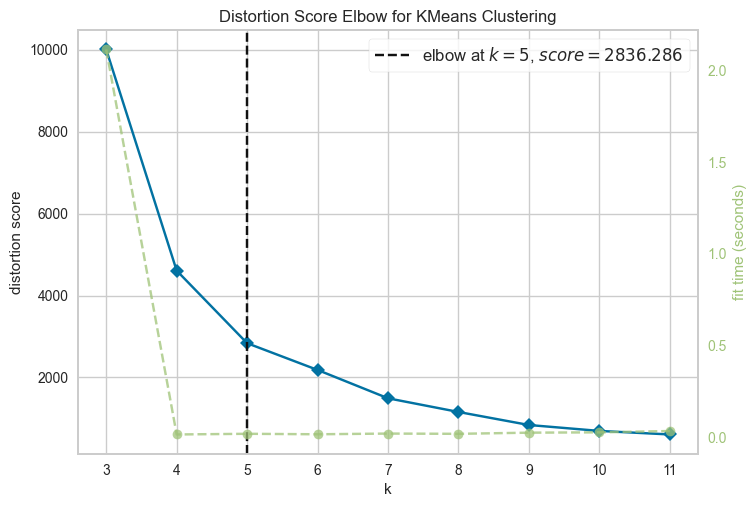

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# On utilise le KElbowVisualizer pour trouver le nombre de cluster le plus adapté

model = KMeans(n_init='auto', random_state=42)

visualiser = KElbowVisualizer(model, k=(3,12))

visualiser.fit(X_scaled)

visualiser.show()

In [45]:
# On divise le jeu de données en 6 clusters

kmeans = KMeans(n_clusters=6, n_init='auto', random_state=42)

kmeans.fit(X_scaled)

# On rajoute le noms des clusters dans le dataframe

rfm['cluster'] = kmeans.labels_

In [46]:
rfm

,client_id,Recency,Frequency,Monetary,cluster
0,c_1,500,43,629.02,0
1,c_10,488,58,1353.60,0
2,c_100,617,8,254.85,4
3,c_1000,491,126,2291.88,0
4,c_1001,461,103,1823.85,0
...,...,...,...,...,...
8595,c_995,555,14,189.41,4
8596,c_996,463,96,1637.34,0
8597,c_997,479,59,1490.01,0
8598,c_998,462,55,2822.22,0


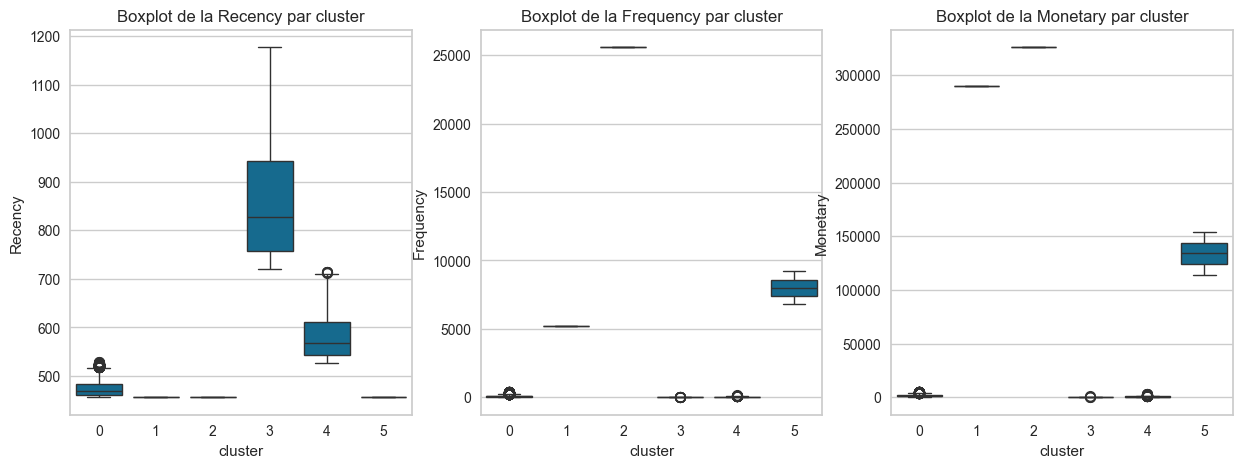

In [63]:
figs, axs = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(
    x=rfm['cluster'],
    y=rfm['Recency'],
    ax=axs[0],
)
axs[0].set_title('Boxplot de la Recency par cluster')

sns.boxplot(
    x=rfm['cluster'],
    y=rfm['Frequency'],
    ax=axs[1],
)
axs[1].set_title('Boxplot de la Frequency par cluster')

sns.boxplot(
    x=rfm['cluster'],
    y=rfm['Monetary'],
    ax=axs[2],
)
axs[2].set_title('Boxplot de la Monetary par cluster')

plt.show()

# Clustering Hierarchique Agglomératif

In [59]:
# Calculer la matrice de liaison

Z = linkage(X_scaled, method='ward')

# Afficher le dendrogramme

plt.figure(figsize=(20,10))
plt.title("Dendrogramme du Clustering Hiérarchique Agglomératif")
dendrogram(Z, labels=rfm.client_id.to_list())
plt.axhline(y=8,color='red',linestyle='--')
plt.xlabel('Index des échantillons')
plt.ylabel('Distance')
plt.show()

KeyboardInterrupt: 

In [55]:
# Création de 3 clusters sur le dataset
agg_clustering = AgglomerativeClustering(n_clusters=3)

agg_clustering.fit(X_scaled)

# On rajoute le numéro du cluster pour chaque client
rfm['cluster_agg'] = agg_clustering.labels_

rfm

,client_id,Recency,Frequency,Monetary,cluster,cluster_agg
0,c_1,500,43,629.02,0,1
1,c_10,488,58,1353.60,0,1
2,c_100,617,8,254.85,4,2
3,c_1000,491,126,2291.88,0,1
4,c_1001,461,103,1823.85,0,1
...,...,...,...,...,...,...
8595,c_995,555,14,189.41,4,1
8596,c_996,463,96,1637.34,0,1
8597,c_997,479,59,1490.01,0,1
8598,c_998,462,55,2822.22,0,1


# PCA

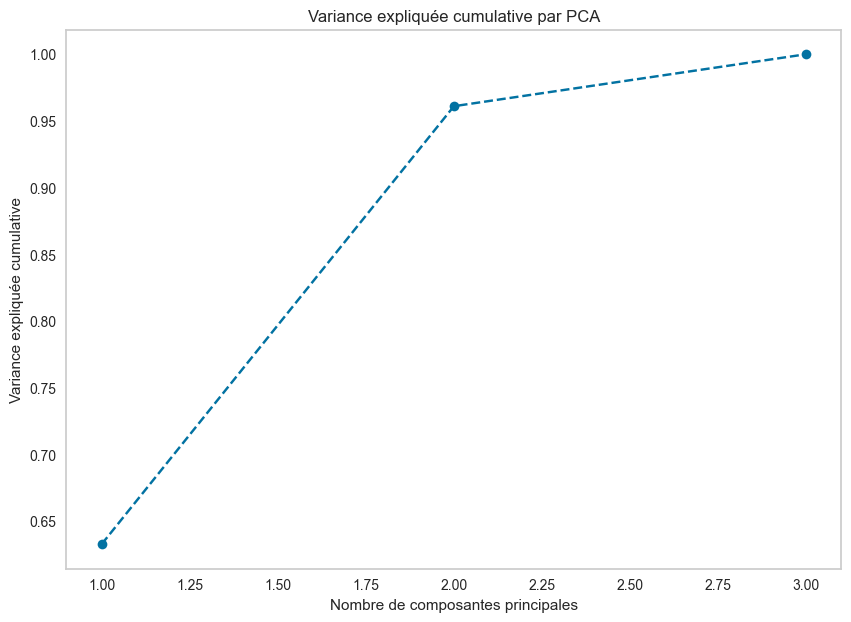

In [51]:
# Appliquer PCA

pca = PCA()
pca.fit(X_scaled)

# Calculer la variance expliquée cumulative

explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Afficher la variance expliquée cumulative

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variance expliquée cumulative par PCA')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.grid()
plt.show()

In [52]:
# On garde que 2 composantes pour garder environ 0.98% des informations
pca = PCA(n_components=2)

df_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])

df_pca

,PC1,PC2
0,-0.197711,0.063421
1,-0.042948,-0.101249
2,-0.556185,1.821046
3,0.229740,-0.019806
4,0.174120,-0.489606
...,...,...
8595,-0.429834,0.881382
8596,0.129399,-0.464606
8597,-0.004657,-0.234976
8598,0.199293,-0.469772


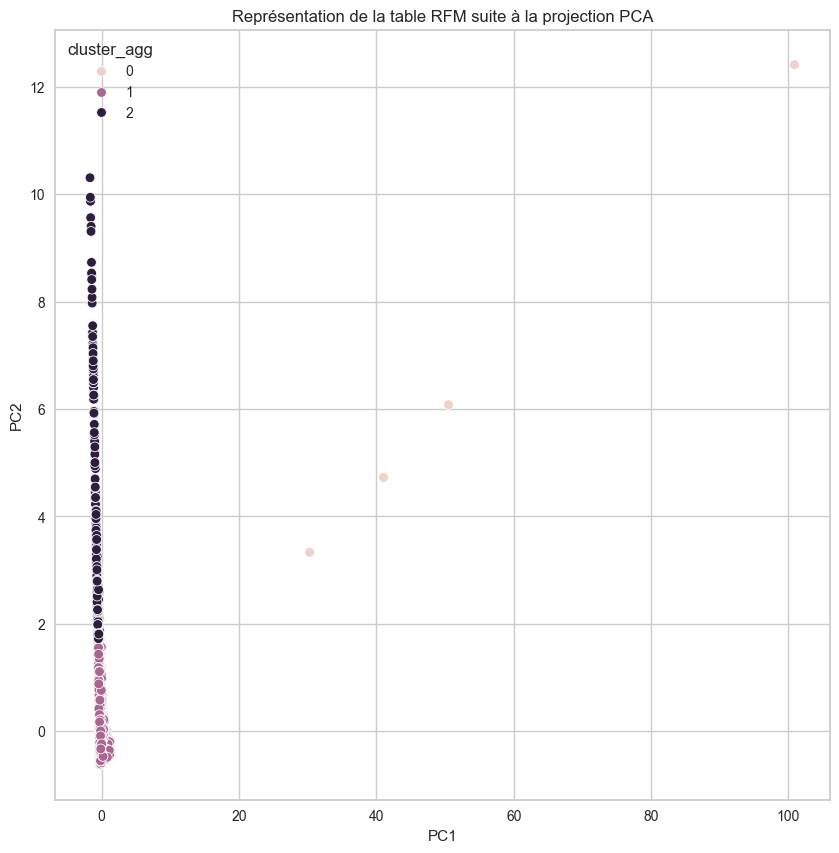

In [56]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue=rfm['cluster_agg'],
)

plt.title('Représentation de la table RFM suite à la projection PCA')

plt.show()

In [57]:
# On rajoute les données projetées dans le dataframe avec les valeurs rfm scalées 

df_X_scaled = pd.DataFrame(data=X_scaled, columns=rfm.columns[1:4])

df_heatmap = pd.concat([df_X_scaled, df_pca], axis=1)

df_heatmap

,Recency,Frequency,Monetary,PC1,PC2
0,0.088387,-0.117844,-0.147919,-0.197711,0.063421
1,-0.095100,-0.069999,-0.008643,-0.042948,-0.101249
2,1.877382,-0.229482,-0.219841,-0.556185,1.821046
3,-0.049228,0.146897,0.171710,0.229740,-0.019806
4,-0.507945,0.073535,0.081747,0.174120,-0.489606
...,...,...,...,...,...
8595,0.929367,-0.210344,-0.232420,-0.429834,0.881382
8596,-0.477364,0.051207,0.045896,0.129399,-0.464606
8597,-0.232715,-0.066810,0.017577,-0.004657,-0.234976
8598,-0.492655,-0.079568,0.273650,0.199293,-0.469772


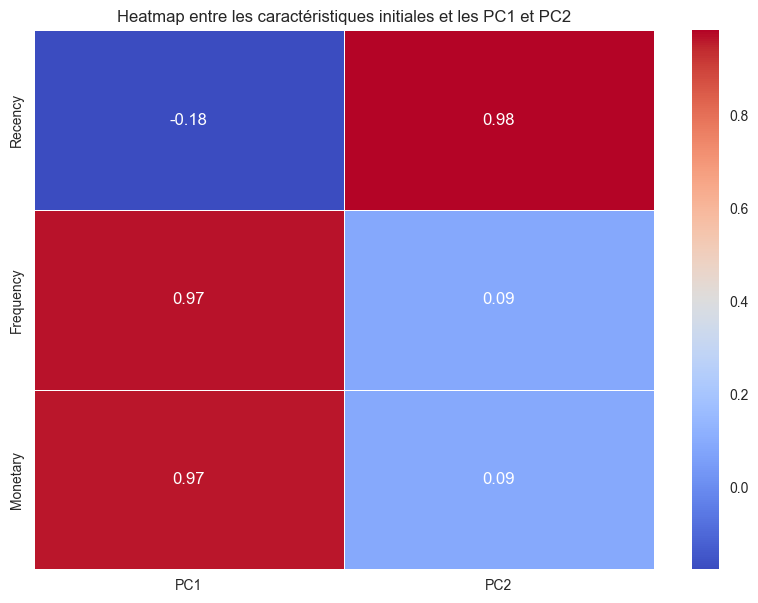

In [58]:
# On créé une heatmap pour vérifier la corrélation entre les variables et les valeurs projetées sur les composantes

df_heatmap_corr = df_heatmap.corr()[['PC1', 'PC2']].loc[['Recency', 'Frequency', 'Monetary'], ['PC1', 'PC2']]

plt.figure(figsize=(10, 7))
sns.heatmap(df_heatmap_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap entre les caractéristiques initiales et les PC1 et PC2')
plt.show()